In [22]:
from manim import *

config.media_width = "100%"

ri = "-s -v WARNING --disable_caching Example"

In [23]:
my_template = TexTemplate()

print("=> documentclass:")
print(my_template.documentclass)
print("=> preamble:")
print(my_template.preamble)
print("=> placeholder_text:")
print(my_template.placeholder_text)

print("======\n=> all template:")
print(my_template.body)

=> documentclass:
\documentclass[preview]{standalone}
=> preamble:
\usepackage[english]{babel}
\usepackage{amsmath}
\usepackage{amssymb}
=> placeholder_text:
YourTextHere
=> all template:
\documentclass[preview]{standalone}
\usepackage[english]{babel}
\usepackage{amsmath}
\usepackage{amssymb}
\begin{document}
YourTextHere
\end{document}


In [24]:
print("==> All template:")
print(my_template.body)

print("=========================")

my_template.add_to_preamble(r"\newcommand{\st}[2]{{\tt S}_{\rm #1}^{\rm #2}}")

print("==> All template:")
print(my_template.body)


==> All template:
\documentclass[preview]{standalone}
\usepackage[english]{babel}
\usepackage{amsmath}
\usepackage{amssymb}
\begin{document}
YourTextHere
\end{document}
==> All template:
\documentclass[preview]{standalone}
\usepackage[english]{babel}
\usepackage{amsmath}
\usepackage{amssymb}
\newcommand{\st}[2]{{\tt S}_{\rm #1}^{\rm #2}}
\begin{document}
YourTextHere
\end{document}


Manim Community v0.18.1

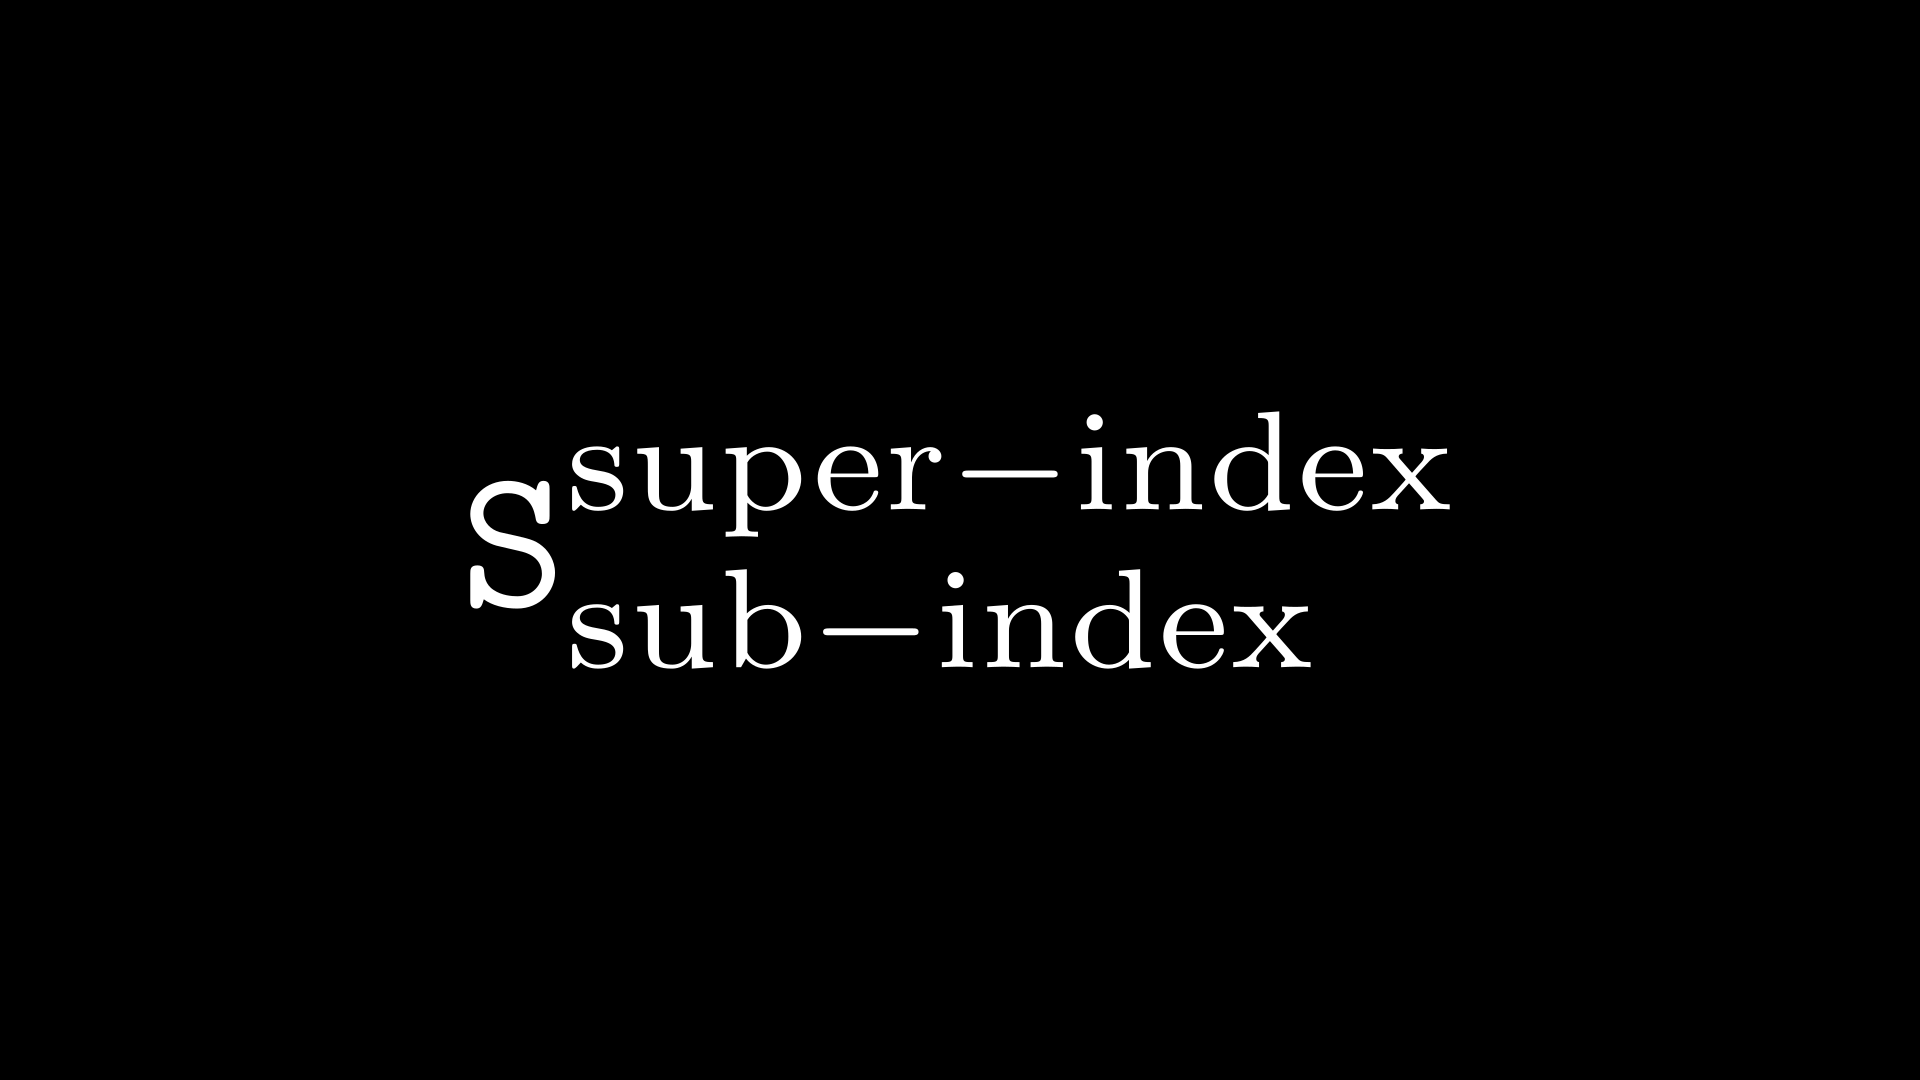

In [25]:
%%manim $ri

class Example(Scene):
    def construct(self):
        text = Tex(r"$\st{sub-index}{super-index}$",tex_template=my_template)
        text.scale(3)
        self.add(text)

In [26]:
%%manim $ri

class Example(Scene):
    def construct(self):
        text = Tex(r"""Lorem ipsum dolor sit amet, consectetur adipiscing elit,
                       sed do eiusmod tempor incididunt ut labore et dolore magna
                       aliqua. Ut enim ad minim veniam, quis nostrud exercitation
                       ullamco laboris nisi ut aliquip ex ea commodo consequat""",
            tex_template=my_template,
            tex_environment=r"\begin{tabular}{p{8 cm}}")
        text.width = config.frame_width - 1
        self.add(text)

Manim Community v0.18.1

[08/16/24 14:58:23] ERROR    LaTeX compilation error: File ended while scanning use of      ]8;id=116237;file://c:\ManimCE\Lib\site-packages\manim\utils\tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=86816;file://c:\ManimCE\Lib\site-packages\manim\utils\tex_file_writing.py#314\314]8;;\
                             \begin .                                                                              
                                                                                                                   

IndexError: list index out of range

In [ ]:
class MyTex(Tex):
    def __init__(self, *args, j_width=4, **kwargs):
        super().__init__(
            *args,
            tex_environment="\\begin{tabular}{p{%s cm}}"%j_width,
            tex_template=my_template,
            **kwargs)

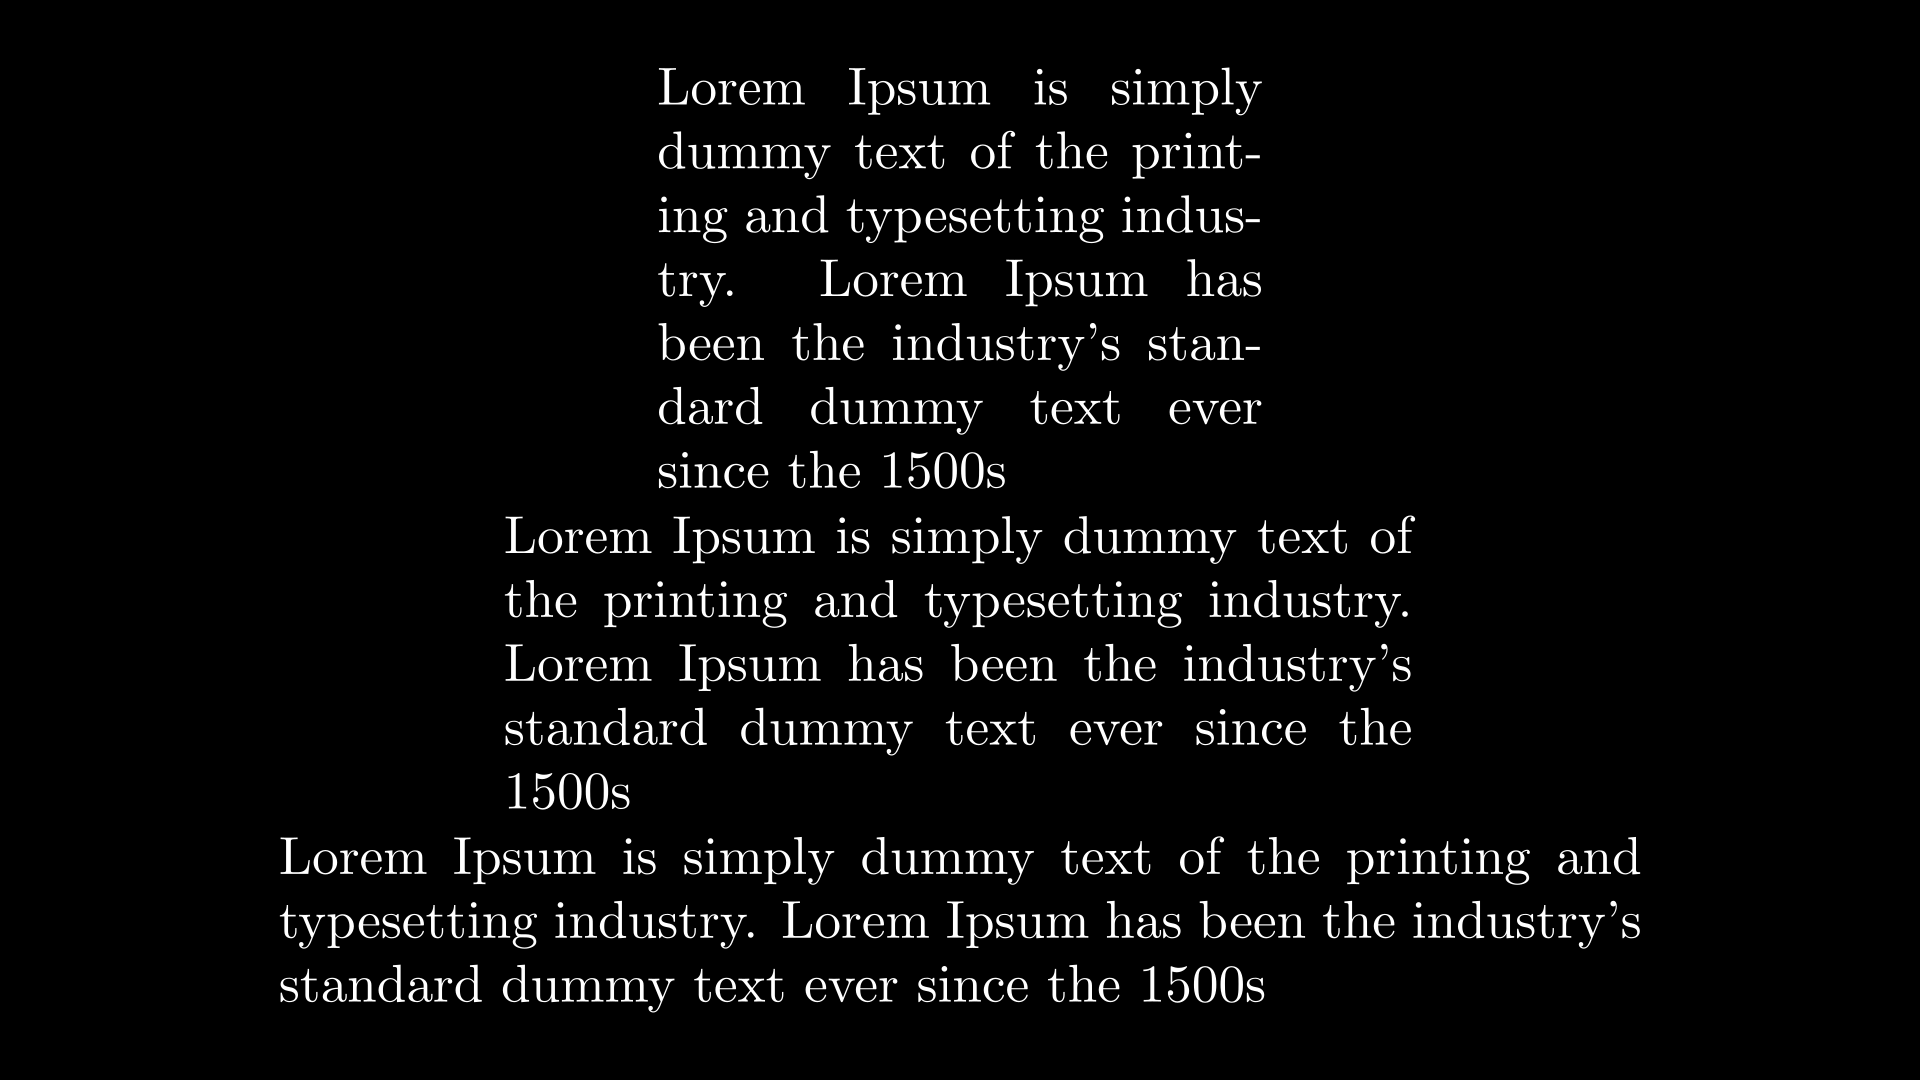

In [ ]:
%%manim $ri

class Example(Scene):
    def construct(self):
        text = "Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s"
        t1 = MyTex(text)
        t2 = MyTex(text, j_width=6)
        t3 = MyTex(text, j_width=9)
        grp = VGroup(t1,t2,t3).arrange(DOWN)
        grp.height = config.frame_height - 1
        self.add(grp)

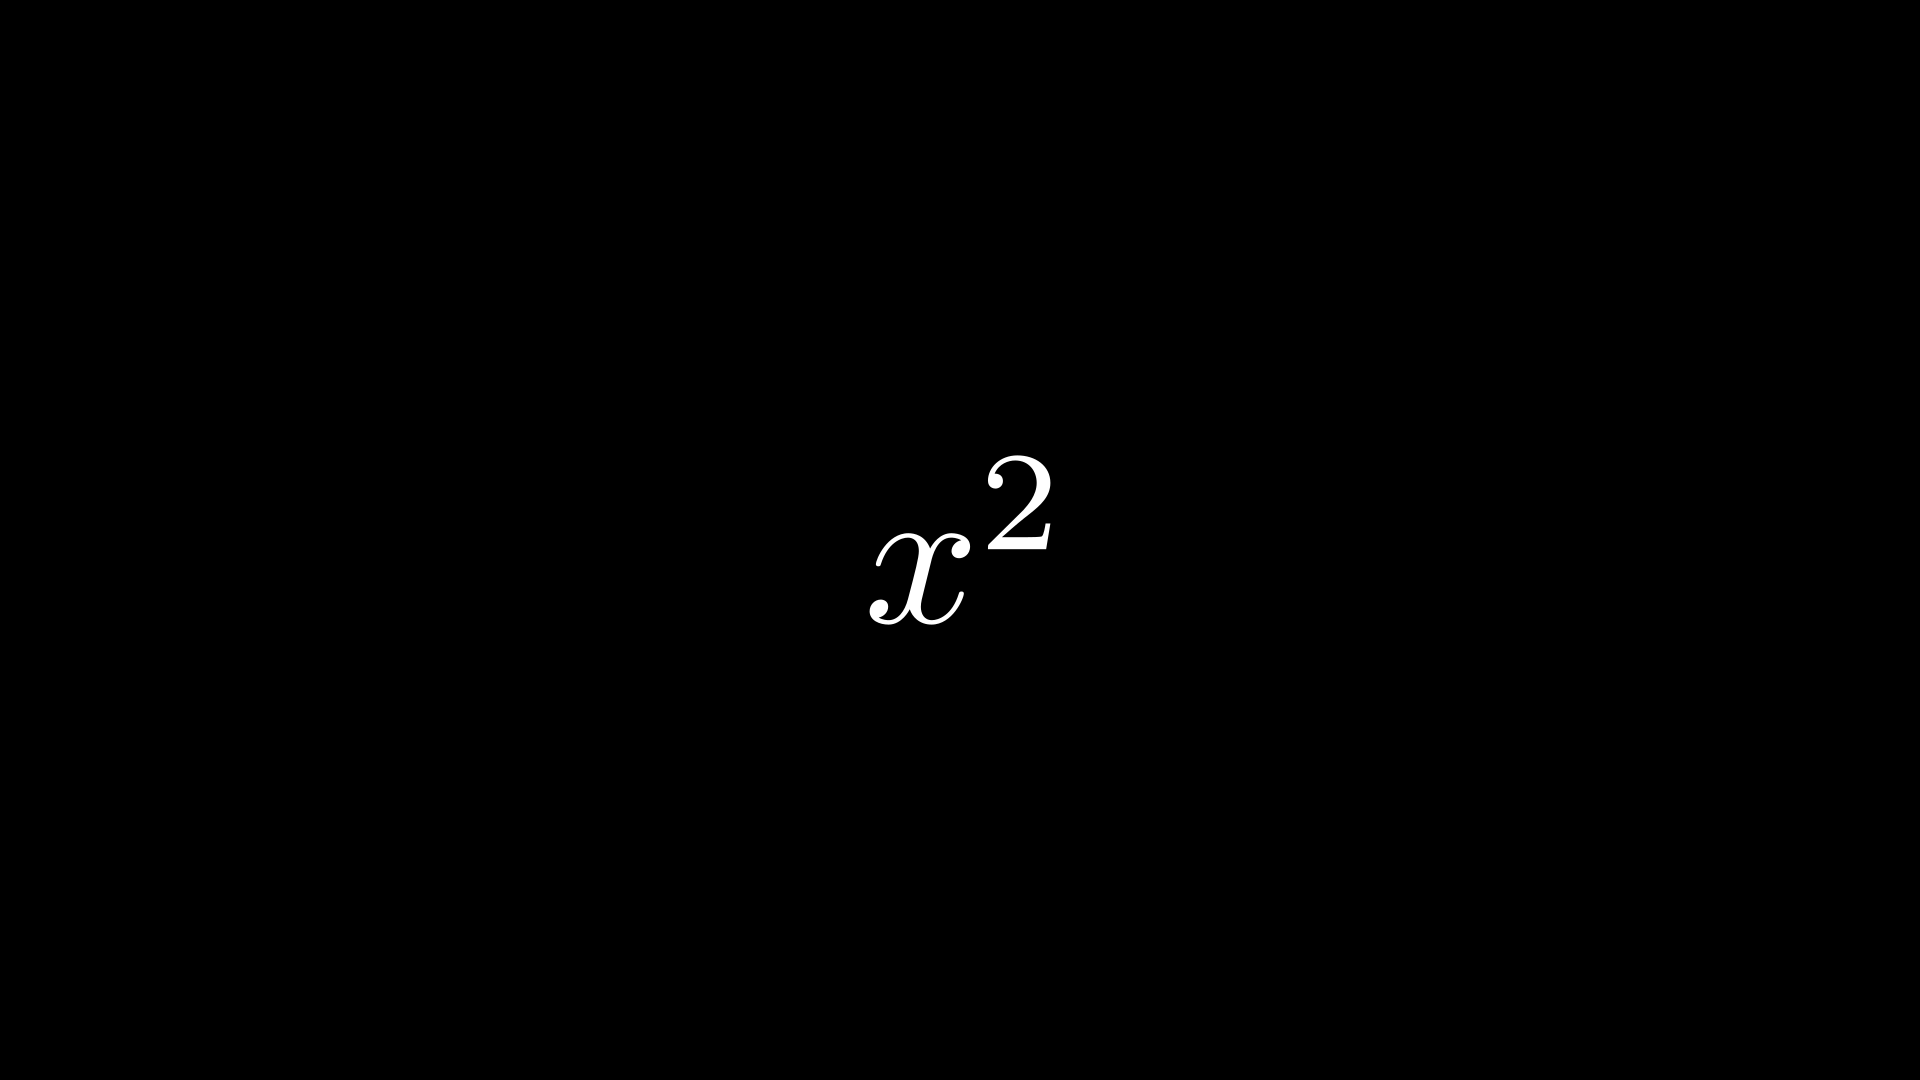

In [ ]:
%%manim --tex_template=my_template.tex $ri 

class Example(Scene):
    def construct(self):
        tex = Tex("\\mycommand")
        self.add(tex.scale(3))

In [ ]:
%%manim $ri 

"""
For now it does not work to use it with the CONFIG dictionary
           ========

hopefully it will be possible in future versions.
"""

class Example(Scene):
    def construct(self):
        config.tex_template_file = "my_template.tex"
        tex = Tex("\\mycommand")
        self.add(tex.scale(3))

FileNotFoundError: [Errno 2] No such file or directory: 'tex_template.tex'